In [41]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support
from preprocessing import PreProcessor
import numpy as np
preprocess = PreProcessor().preprocess
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Mapped.csv')
df = df.dropna(subset = ['Category', 'Item', 'Item Description'])
corpus = df['Item'] + df['Item Description']
corpus = corpus.apply(lambda d: preprocess(d , lower_case=False, strip=False, punctuation=False, numbers=False, unicode=False, cut_off=False, stop_words=False, stemming=False, lemmatizing=False, min_word_length=-1, max_word_length=-1, tokenize=False))

In [4]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X = tfidf.fit_transform(corpus)
Y = df["Category"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0) 

(0.9614741125932625, 0.9614741125932625, 0.9614741125932625, None)


Text(0.5, 87.0, 'Predicted')

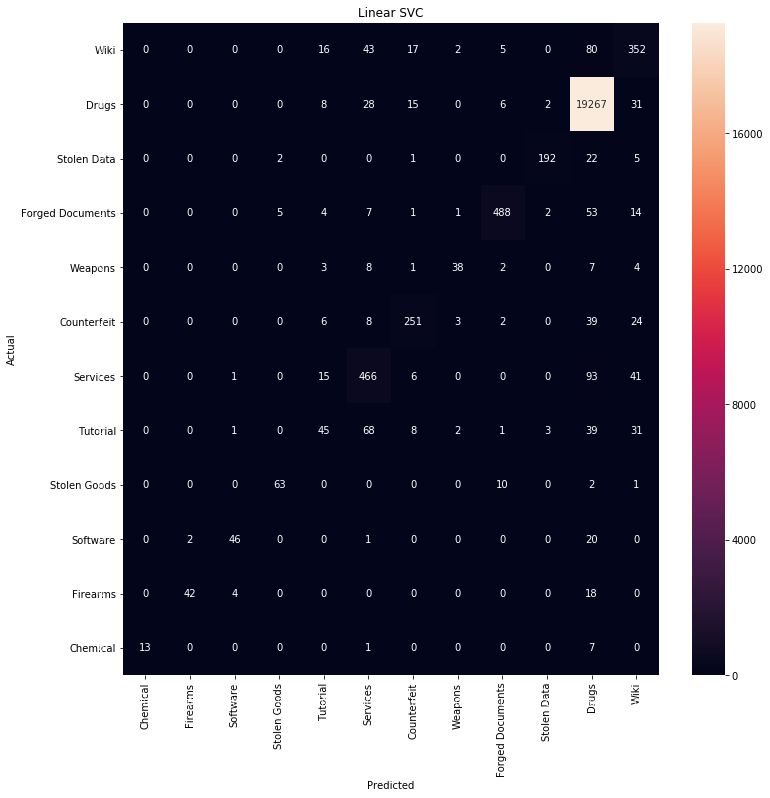

In [48]:
SVC = LinearSVC().fit(X_Train, Y_Train)
Y_Pred = SVC.predict(X_Test)
print(precision_recall_fscore_support(Y_Pred, Y_Test, average='micro'))
cm = confusion_matrix(Y_Test, Y_Pred, Y.unique())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=Y_Test.unique(), yticklabels=Y_Test.unique())
ax.set_ylim(len(cm)-1, 0)
ax.set_xlim(len(cm)-1, 0)
plt.title('Linear SVC')
plt.ylabel('Actual')
plt.xlabel('Predicted')

(0.9517522043861633, 0.9517522043861633, 0.9517522043861633, None)


Text(0.5, 87.0, 'Predicted')

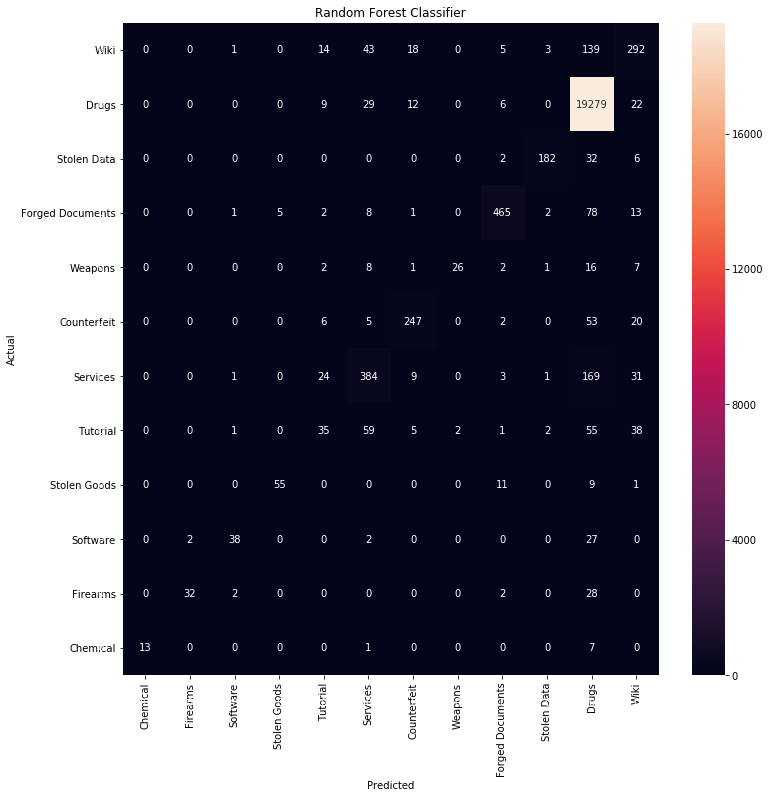

In [49]:
RFC = RandomForestClassifier().fit(X_Train, Y_Train)
Y_Pred = RFC.predict(X_Test)
print(precision_recall_fscore_support(Y_Pred, Y_Test, average='micro'))
cm = confusion_matrix(Y_Test, Y_Pred, Y.unique())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=Y_Test.unique(), yticklabels=Y_Test.unique())
ax.set_ylim(len(cm)-1, 0)
ax.set_xlim(len(cm)-1, 0)
plt.title('Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')

(0.9420755143567714, 0.9420755143567714, 0.9420755143567714, None)


Text(0.5, 87.0, 'Predicted')

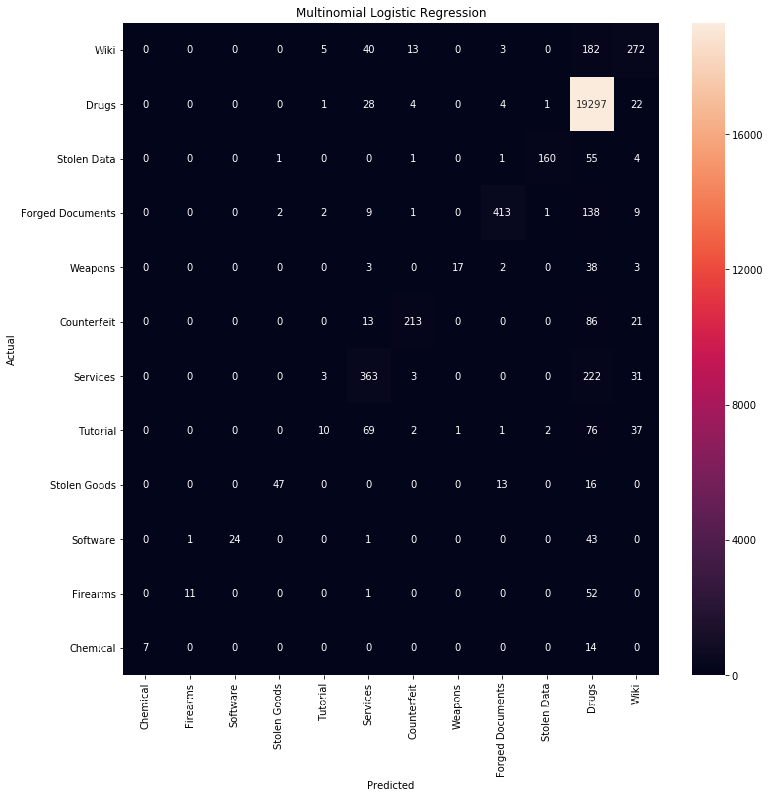

In [50]:
MLG = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_Train, Y_Train)
Y_Pred = MLG.predict(X_Test)
print(precision_recall_fscore_support(Y_Pred, Y_Test, average='micro'))
cm = confusion_matrix(Y_Test, Y_Pred, Y.unique())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=Y_Test.unique(), yticklabels=Y_Test.unique())
ax.set_ylim(len(cm)-1, 0)
ax.set_xlim(len(cm)-1, 0)
plt.title('Multinomial Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

(0.9526565679403121, 0.9526565679403121, 0.9526565679403121, None)


Text(0.5, 87.0, 'Predicted')

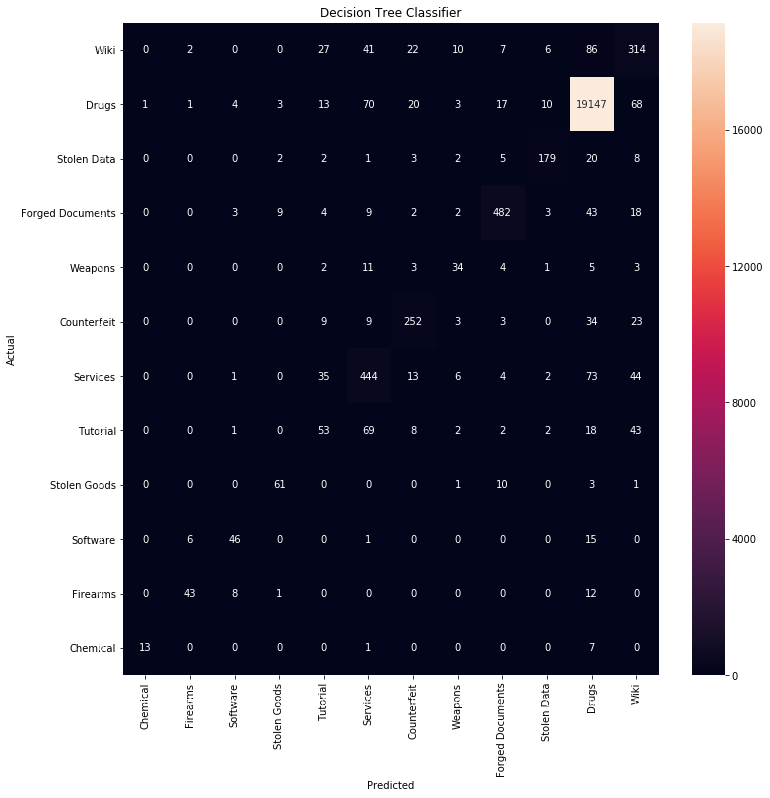

In [51]:
DTC = DecisionTreeClassifier().fit(X_Train, Y_Train)
Y_Pred = DTC.predict(X_Test)
print(precision_recall_fscore_support(Y_Pred, Y_Test, average='micro'))
cm = confusion_matrix(Y_Test, Y_Pred, Y.unique())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=Y_Test.unique(), yticklabels=Y_Test.unique())
ax.set_ylim(len(cm)-1, 0)
ax.set_xlim(len(cm)-1, 0)
plt.title('Decision Tree Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')